# Negation scope - withOUT bag of words
## Loading dataset

In [1]:
from datetime import datetime
from negation_scope_common import create_semi_dataset, create_vectorizer, create_columns_names
from negation_scope_common import create_features_list, save_to_csv
from utils import get_datasets


def create_dataset(dataset, sufix):
    ouput_name = '{}.csv'.format(dataset[:-4])
    print('{} START Creating semi dataset {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    X_train, X_test = create_semi_dataset(dataset)
    vect_lemma = create_vectorizer(X_train)
    column_names = create_columns_names(X_train, vect_lemma, add_bow=False)
    print('{} START Creating features list {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    X_train_features_list = create_features_list(X_train, vect_lemma, add_bow=False)
    X_test_features_list = create_features_list(X_test, vect_lemma, add_bow=False)
    print('{} START Save csv {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    save_to_csv(ouput_name + sufix + '-train', column_names, X_train_features_list)
    save_to_csv(ouput_name + sufix + '-test', column_names, X_test_features_list)
    print('{} START Save csv {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))


for dataset in get_datasets():
    create_dataset(dataset, '-sco')

2017-05-02 19:35:26 START Creating semi dataset dataset/beletria/merged.xml


2017-05-02 19:35:26 START Creating features list dataset/beletria/merged.xml


2017-05-02 19:35:59 START Save csv dataset/beletria/merged.xml


2017-05-02 19:36:01 START Save csv dataset/beletria/merged.xml
2017-05-02 19:36:01 START Creating semi dataset dataset/recenzie/merged.xml
2017-05-02 19:36:01 START Creating features list dataset/recenzie/merged.xml


2017-05-02 19:36:29 START Save csv dataset/recenzie/merged.xml


2017-05-02 19:36:31 START Save csv dataset/recenzie/merged.xml
2017-05-02 19:36:31 START Creating semi dataset dataset/snk/merged.xml


2017-05-02 19:36:31 START Creating features list dataset/snk/merged.xml


2017-05-02 19:37:24 START Save csv dataset/snk/merged.xml


2017-05-02 19:37:26 START Save csv dataset/snk/merged.xml
2017-05-02 19:37:26 START Creating semi dataset dataset/sport/merged.xml


2017-05-02 19:37:27 START Creating features list dataset/sport/merged.xml


2017-05-02 19:38:02 START Save csv dataset/sport/merged.xml


2017-05-02 19:38:04 START Save csv dataset/sport/merged.xml
2017-05-02 19:38:04 START Creating semi dataset dataset/vlastne_mario/merged.xml
2017-05-02 19:38:04 START Creating features list dataset/vlastne_mario/merged.xml


2017-05-02 19:38:07 START Save csv dataset/vlastne_mario/merged.xml
2017-05-02 19:38:07 START Save csv dataset/vlastne_mario/merged.xml


In [2]:
create_dataset('dataset/snk/merged.xml', '-sco')

2017-05-02 18:04:54 START Creating semi dataset dataset/snk/merged.xml


2017-05-02 18:04:54 START Creating features list dataset/snk/merged.xml


## Training

In [1]:
%%time
from negation_common import load_dataset

df_train, df_test, df2_train, df2_test = load_dataset('dataset/snk/merged.csv', 
                                                      '-sco', 
                                                      ['token', 'lemma', 'POS', 'is_in_scope', 'negator_pos'])

CPU times: user 962 ms, sys: 186 ms, total: 1.15 s
Wall time: 1.47 s


In [2]:
%%time
# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# model = MultinomialNB()
# model = GaussianNB()
# model = BernoulliNB()
# model = SVC()
model = RandomForestClassifier()

# Train the model using the training sets 
model.fit(df2_train, df_train.is_in_scope)

CPU times: user 742 ms, sys: 114 ms, total: 857 ms
Wall time: 1.13 s


## Metrics

In [3]:
from utils import print_score_for

y_true, y_pred = print_score_for(model, df2_test, y_true=df_test.is_in_scope)

Accuracy: 0.9378378378378378
Precision: 0.8859060402684564
Recall: 0.4782608695652174
F1 score: 0.6211764705882353
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      2314
          1       0.89      0.48      0.62       276

avg / total       0.94      0.94      0.93      2590



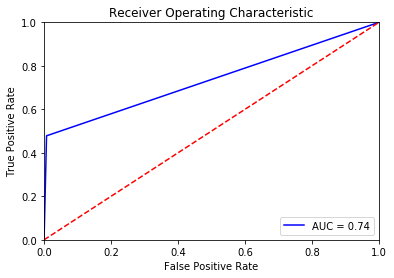

In [4]:
from utils import show_roc_curve

show_roc_curve(y_true, y_pred).show()

dataset/beletria/merged.xml


Accuracy: 0.9134199134199135
Precision: 0.8083333333333333
Recall: 0.41452991452991456
F1 score: 0.5480225988700564
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      1614
          1       0.81      0.41      0.55       234

avg / total       0.91      0.91      0.90      1848



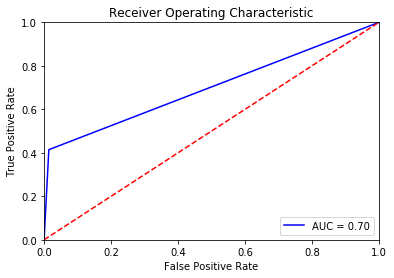

dataset/recenzie/merged.xml


Accuracy: 0.9073684210526316
Precision: 0.6953125
Recall: 0.489010989010989
F1 score: 0.5741935483870968
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1243
          1       0.70      0.49      0.57       182

avg / total       0.90      0.91      0.90      1425



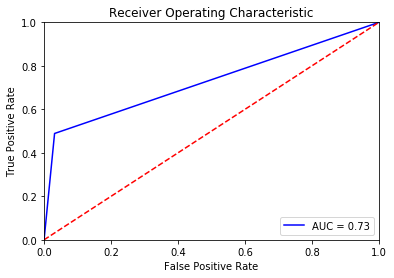

dataset/snk/merged.xml


Accuracy: 0.9378378378378378
Precision: 0.8859060402684564
Recall: 0.4782608695652174
F1 score: 0.6211764705882353
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      2314
          1       0.89      0.48      0.62       276

avg / total       0.94      0.94      0.93      2590



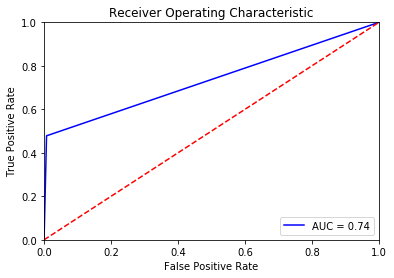

dataset/sport/merged.xml


Accuracy: 0.8457420924574209
Precision: 0.9285714285714286
Recall: 0.3572938689217759
F1 score: 0.516030534351145
             precision    recall  f1-score   support

          0       0.84      0.99      0.91      1582
          1       0.93      0.36      0.52       473

avg / total       0.86      0.85      0.82      2055



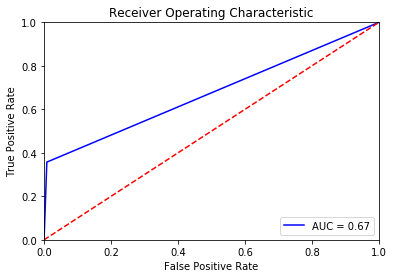

dataset/vlastne_mario/merged.xml
Accuracy: 0.8958333333333334
Precision: 0.8666666666666667
Recall: 0.41935483870967744
F1 score: 0.5652173913043478
             precision    recall  f1-score   support

          0       0.90      0.99      0.94       161
          1       0.87      0.42      0.57        31

avg / total       0.89      0.90      0.88       192



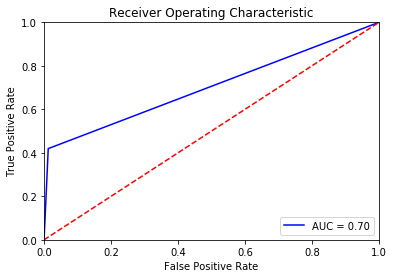

In [3]:
import pickle
from negation_common import load_dataset
from utils import get_datasets, print_score_for, show_roc_curve

with open('model-forest-sco.pkl', 'rb') as f:
    model = pickle.load(f)

sufix = '-sco'
for dataset in get_datasets():
    print('============================================')
    print(dataset)
    df_train, df_test, df2_train, df2_test = load_dataset(dataset, sufix, 
                                                          ['token', 'lemma', 'POS', 'is_in_scope', 'negator_pos'])
    y_true, y_pred = print_score_for(model, df2_test, y_true=df_test.is_in_scope)
    plot = show_roc_curve(y_true, y_pred)
    img_name = dataset.split('/')[1]
    plot.savefig('images/sco-{}.svg'.format(img_name), transparent=True)
    plot.show()

In [5]:
dataset = 'dataset/snk/merged.xml'
sufix = '-sco'
ouput_name = '{}.csv'.format(dataset[:-4])
X_train, X_test = create_semi_dataset(dataset)
vect_lemma = create_vectorizer(X_train)
column_names = create_columns_names(X_train, vect_lemma, add_bow=False)
# X_train_features_list = create_features_list(X_train, vect_lemma, add_bow=False)
X_test_features_list = create_features_list(X_test, vect_lemma, add_bow=False)
# save_to_csv(ouput_name + sufix + '-train', column_names, X_train_features_list)
# save_to_csv(ouput_name + sufix + '-test', column_names, X_test_features_list)

In [ ]:
#
# Save model
#

import pickle
with open('model-forest-sco.pkl', 'wb') as fout:
    pickle.dump(model, fout)